# **What is RFM Analysis?** 
***RFM analysis*** stands for **Recency**, **Frequency**, and **Monetary**. It is an analysis method used in marketing to segment customers based on their purchasing behaviour.
The main goal is to identify the most valuable customers for the business, so the marketing efforts can be targeted more effectively. 

**It has three main components:**

**Recency** 
How recently has a customer made a purchase, such customers are more likely to respond to marketing emails and buy again. 

**Frequency** 
How often does a customer make a purchase. Frequent buyers are more valuable to the business and hold a higher lifetime value.

**Monetary** 
Customers whontypically spend more, are more valuable for the business.

***How does RMF analysis work?***

The customers are typically segmented based on the calculated RFM score, which is a consolidation of each individual score in the area of Recency, Frequency, and Monetary. 
And the score has a typical range of 1 - 5, where 1 is the lowerst possible score, and 5 is the highest. 

**Example**

Say a customer has the following scores:
Recency : 5, Frequency: 4, Monetary: 5
The RMF score for this customer will be **545**

If say customer 1 has a socre of 545, and customer 2 has a score of 544, according to the analysis logic, customer 1 is more valuable. 
While both customers buy goods at same frequency, 1.) The **monetary** value is higher for customer 1, 2.) This customer also has a recent purchace history. 



By understanding this one can make an informed decision regarding which customers to target, and which of them are worth targeting. 
As this is crutial in order to utilise the marketing budget in a wise and an effective manner. 



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/ecommerce-data/data.csv


In [2]:
filepath = '/kaggle/input/ecommerce-data/data.csv'
data = pd.read_csv(filepath, encoding = 'ISO-8859-1')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# Checking for the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Removing the negative quantities from data
data = data[data['Quantity']>0]
data = data[data['UnitPrice']>0]

# Converting the 'InvoiceDate' to date time format

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Calculating the TotalCost for each product sold

data['TotalCost'] = data['Quantity'] * data['UnitPrice']

In [6]:
# Checking for null values
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
TotalCost           0
dtype: int64


In [7]:
#Seeing as there are many null values in 'CustomerID'column we drop those Null rows

cln_data = data.dropna(subset = ['CustomerID'])
print(cln_data.isnull().sum()) # Checking for null values again

cln_data

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalCost      0
dtype: int64


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
cln_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [9]:
# Calculating Recency, Frequency, and Monetary

current_date = cln_data['InvoiceDate'].max()
current_date

recency = cln_data.groupby('CustomerID')['InvoiceDate'].max()
recency = (current_date - recency).dt.days

# Frequency
frequency = cln_data.groupby('CustomerID')['InvoiceDate'].nunique()

# Monetary
monetary = cln_data.groupby('CustomerID')['TotalCost'].sum()

In [10]:
# Combining the Recency, Frequency, and Monetary in one useable dataframe

rfm_df = pd.DataFrame({

    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

In [11]:
rfm_df.head(10)


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
12352.0,35,8,2506.04
12353.0,203,1,89.00
12354.0,231,1,1079.40
12355.0,213,1,459.40


In [12]:
# Merging the values of 'InvoiceDate' in the rfm_df

rfm = pd.merge(rfm_df, cln_data[['CustomerID','InvoiceDate']],on = 'CustomerID', how = 'inner')

rfm.head(5)

,CustomerID,Recency,Frequency,Monetary,InvoiceDate
0,12346.0,325,1,77183.6,2011-01-18 10:01:00
1,12347.0,1,7,4310.0,2010-12-07 14:57:00
2,12347.0,1,7,4310.0,2010-12-07 14:57:00
3,12347.0,1,7,4310.0,2010-12-07 14:57:00
4,12347.0,1,7,4310.0,2010-12-07 14:57:00


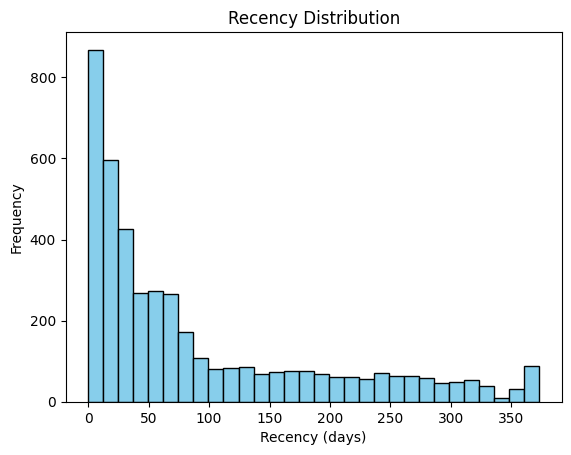

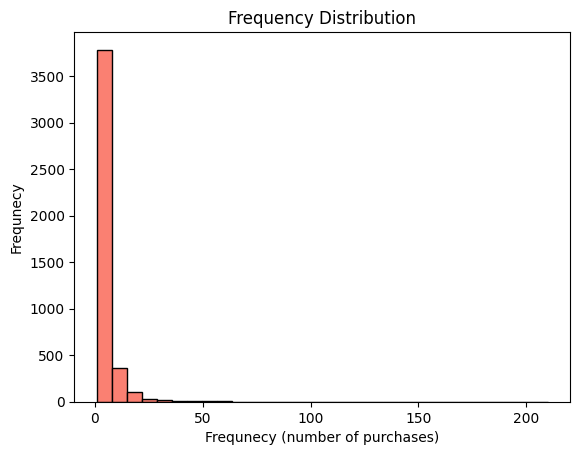

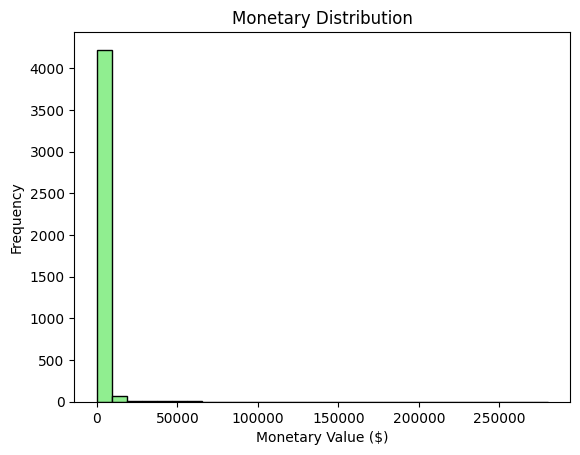

In [13]:
# Visualising the RFM data
# Plotting a histogram for Recency

plt.hist(rfm_df['Recency'], bins = 30, color = 'skyblue', edgecolor = 'black')
plt.title('Recency Distribution')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.show()

# Plotting a histogram for Frequency

plt.hist(rfm_df['Frequency'], bins = 30, color = 'salmon', edgecolor = 'black')
plt.title('Frequency Distribution')
plt.xlabel('Frequnecy (number of purchases)')
plt.ylabel('Frequnecy')
plt.show()

# Plotting a histogram for Monetary
plt.hist(rfm_df['Monetary'], bins = 30, color = 'lightgreen', edgecolor = 'black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary Value ($)')
plt.ylabel('Frequency')
plt.show()

            Recency  Frequency  Monetary
Recency    1.000000  -0.260616 -0.122097
Frequency -0.260616   1.000000  0.549568
Monetary  -0.122097   0.549568  1.000000


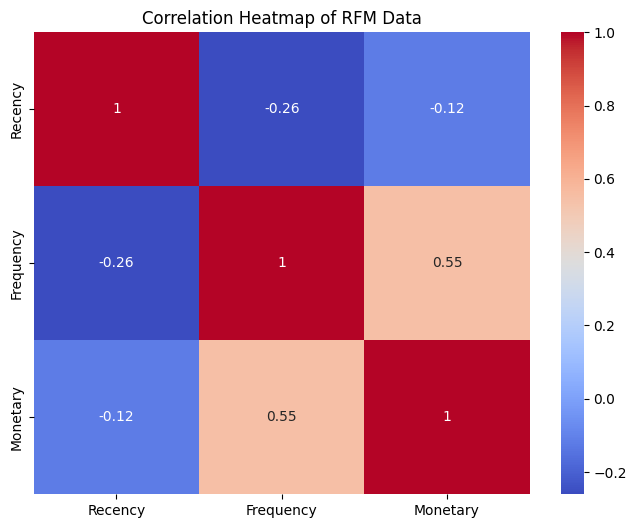

In [14]:
# Ploting a Heatmap, to visualise the correlation between the RFM variables

rfm_corr = rfm_df[['Recency', 'Frequency','Monetary']].corr()

print(rfm_corr)
# Creating the heatmap
plt.figure(figsize = (8,6))
sns.heatmap(rfm_corr, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap of RFM Data')
plt.show()

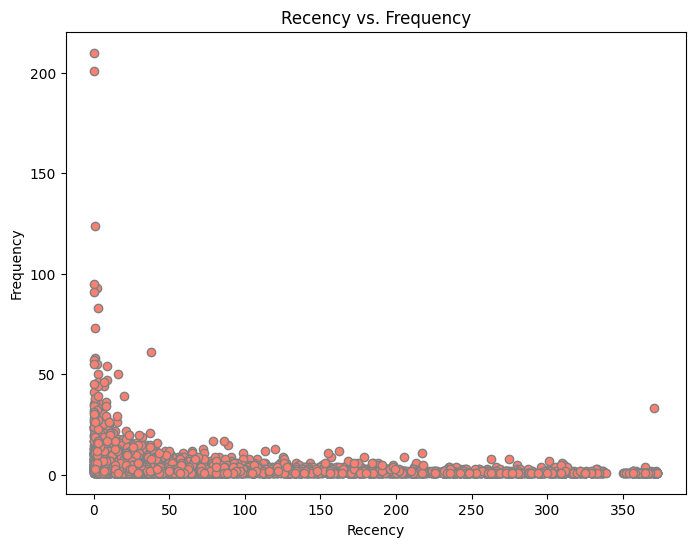

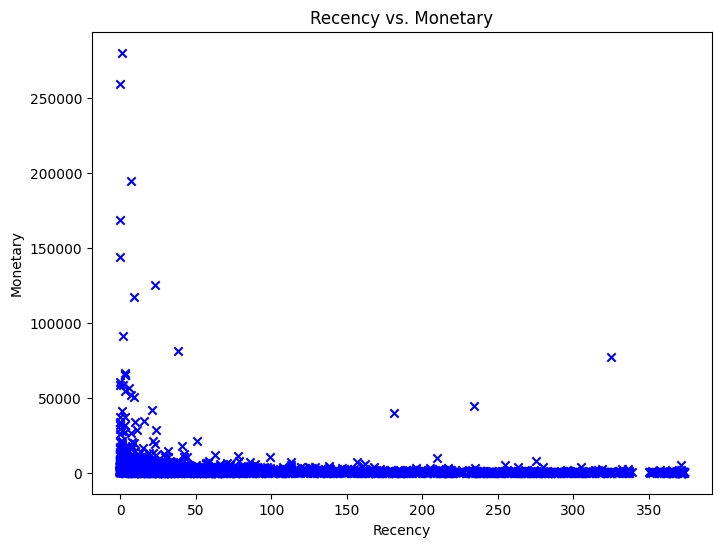

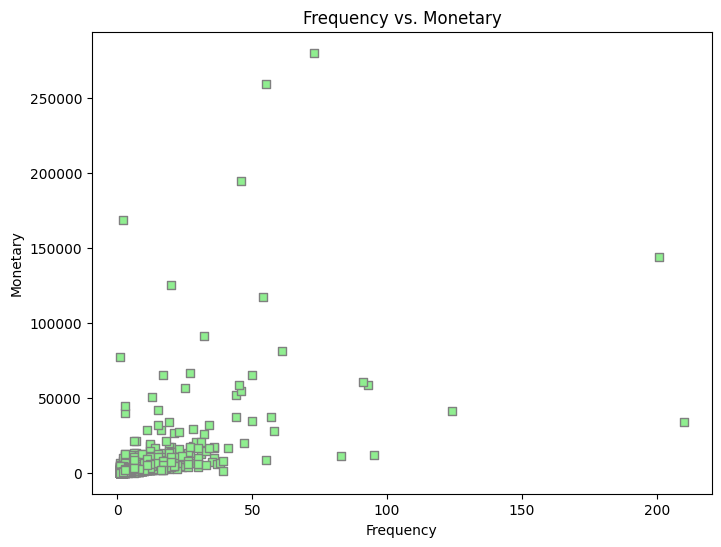

In [15]:
# Scatter plot
# R vs. F
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'], color = 'salmon', marker = 'o', edgecolor='gray')
plt.title('Recency vs. Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# R vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Recency'], rfm_df['Monetary'], color = 'blue', marker = 'x')
plt.title('Recency vs. Monetary')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

# F vs. M
plt.figure(figsize = (8,6))
plt.scatter(rfm_df['Frequency'], rfm_df['Monetary'], color = 'lightgreen', marker = 's', edgecolor='gray')
plt.title('Frequency vs. Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

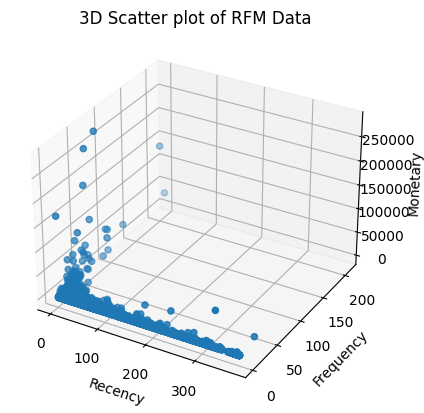

In [16]:
# Plotting a 3D scatter plot

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection ='3d')

ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['Monetary'])

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.title('3D Scatter plot of RFM Data')
plt.show()

In [17]:
# Calculating the Customer Scores

rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], 5, labels=[1, 2, 3, 4],duplicates='drop')  
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['Monetary'], 5, labels=[1, 2, 3, 4, 5])  
# Combining the scores into one RFM score
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)


In [18]:
rfm_df.describe()

print(rfm_df['RFMScore'].dtype)

object


In [19]:
#Converting the RFMScore Column to int

rfm_df['RFMScore'] = pd.to_numeric(rfm_df['RFMScore'])
print(rfm_df['RFMScore'].dtype)
rfm_df.head(10)

int64


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,4,5,545
12348.0,74,4,1797.24,2,3,4,234
12349.0,18,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112
12352.0,35,8,2506.04,3,4,5,345
12353.0,203,1,89.00,1,1,1,111
12354.0,231,1,1079.40,1,1,4,114
12355.0,213,1,459.40,1,1,2,112


In [20]:
# Segementing Customers

def segment_customer_based_on_rfm_score(row):
    if row['RFMScore'] >= 500:
        return 'Champions'
    elif 400 <= row['RFMScore'] < 500:
        return 'Loyal Customers'
    elif 300 <= row['RFMScore'] < 400:
        return 'Potential Loyalists'
    elif 200 <= row['RFMScore'] < 300:
        return 'At Risk'
    else:
        return 'Lost Customers'

rfm_df['Segment'] = rfm_df.apply(segment_customer_based_on_rfm_score, axis=1)

rfm_df.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Segment
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,5,115,Lost Customers
12347.0,1,7,4310.00,5,4,5,545,Champions
12348.0,74,4,1797.24,2,3,4,234,At Risk
12349.0,18,1,1757.55,4,1,4,414,Loyal Customers
12350.0,309,1,334.40,1,1,2,112,Lost Customers


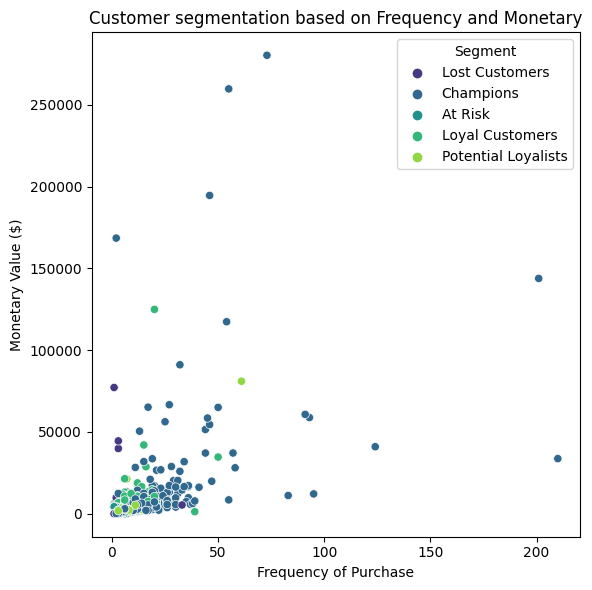

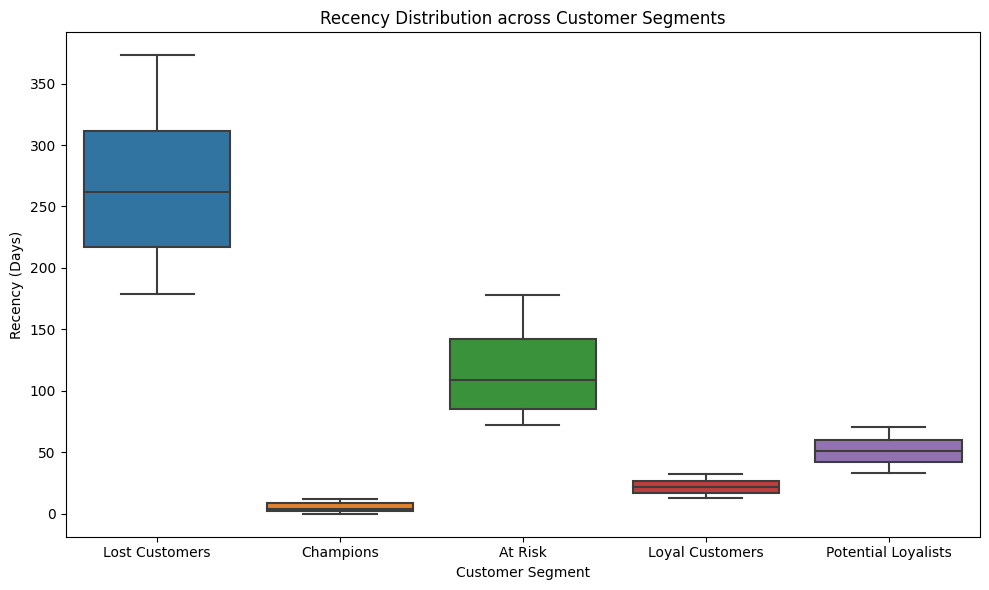

In [21]:
# Visualising the segments

plt.figure(figsize=(6,6))

# Scatter plot of Frequecy vs. Monetary, colored by segment
sns.scatterplot(x = 'Frequency', y='Monetary', hue = 'Segment', data = rfm_df, palette='viridis')
plt.title('Customer segmentation based on Frequency and Monetary')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Monetary Value ($)')
plt.tight_layout()
plt.show()

# Plot distribution of Recency scores across segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Recency', data=rfm_df)
plt.title('Recency Distribution across Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Recency (Days)')
plt.tight_layout()
plt.show()




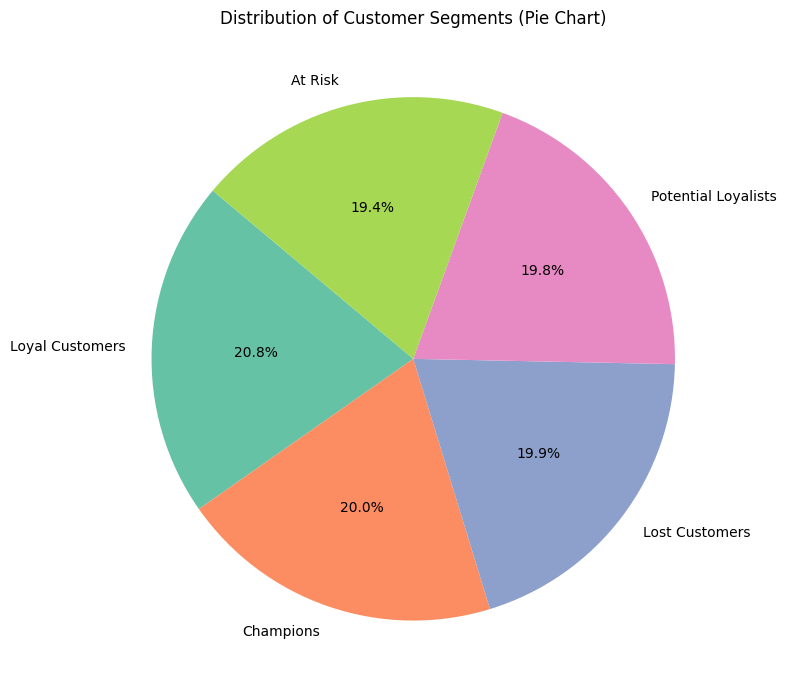

In [22]:
# Pie Chart of cutomer segments
segment_counts = rfm_df['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Distribution of Customer Segments (Pie Chart)')
plt.tight_layout()
plt.show()

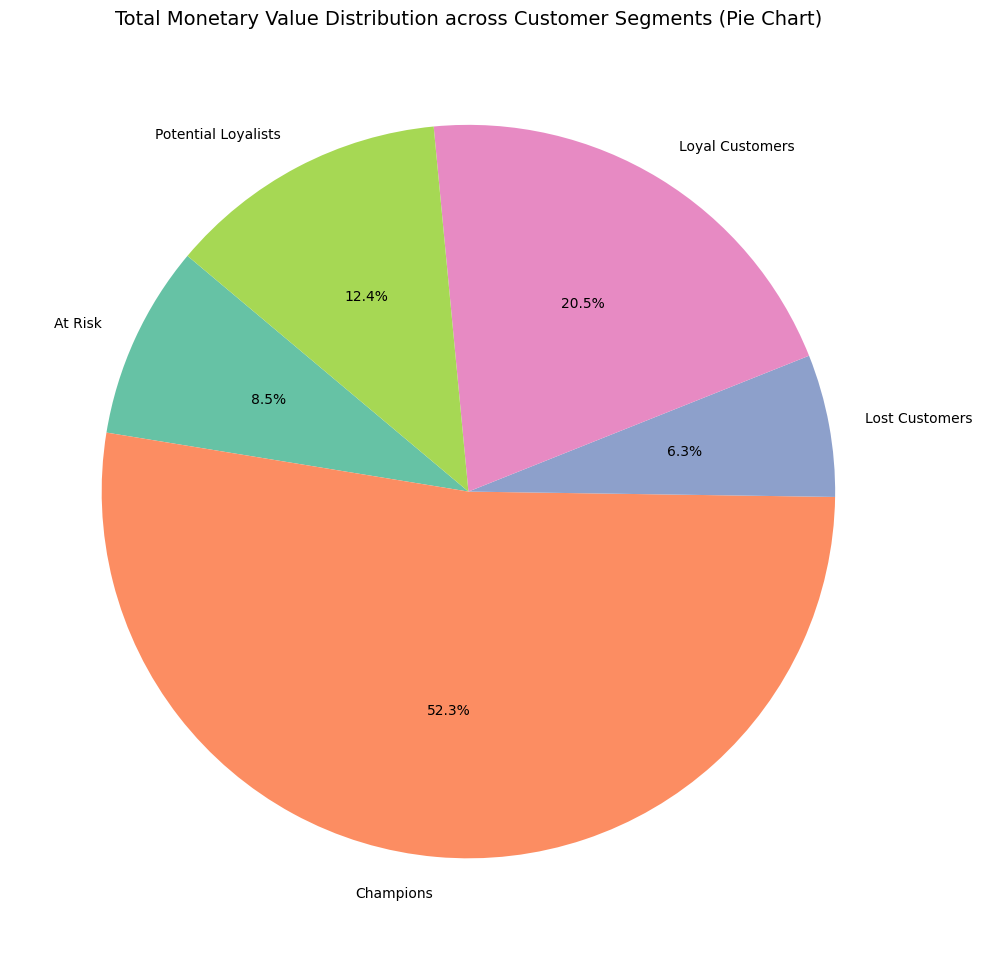

In [23]:
#Pie chart showing the distribution of the cutomer segments based on monetary expenditure

monetary_per_segment = rfm_df.groupby('Segment')['Monetary'].sum()
plt.figure(figsize=(10, 10))
plt.pie(monetary_per_segment, labels=monetary_per_segment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Total Monetary Value Distribution across Customer Segments (Pie Chart)', fontsize=14)
plt.tight_layout()
plt.show()